In [1]:
from bokeh.palettes import Plasma256
import datetime
from geopy.geocoders import Nominatim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot

import seaborn as sns

In [2]:
init_notebook_mode(connected=True)

In [3]:
geolocator = Nominatim(user_agent="test")

# Data Load

In [4]:
energy = pd.read_csv("Energy Census and Economic Data US 2010-2014.csv")
energy.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


# Slice and Augment

In [5]:
energy.shape

(52, 192)

In [6]:
columns = list(energy.columns); columns

['StateCodes',
 'State',
 'Region',
 'Division',
 'Coast',
 'Great Lakes',
 'TotalC2010',
 'TotalC2011',
 'TotalC2012',
 'TotalC2013',
 'TotalC2014',
 'TotalP2010',
 'TotalP2011',
 'TotalP2012',
 'TotalP2013',
 'TotalP2014',
 'TotalE2010',
 'TotalE2011',
 'TotalE2012',
 'TotalE2013',
 'TotalE2014',
 'TotalPrice2010',
 'TotalPrice2011',
 'TotalPrice2012',
 'TotalPrice2013',
 'TotalPrice2014',
 'TotalC10-11',
 'TotalC11-12',
 'TotalC12-13',
 'TotalC13-14',
 'TotalP10-11',
 'TotalP11-12',
 'TotalP12-13',
 'TotalP13-14',
 'TotalE10-11',
 'TotalE11-12',
 'TotalE12-13',
 'TotalE13-14',
 'TotalPrice10-11',
 'TotalPrice11-12',
 'TotalPrice12-13',
 'TotalPrice13-14',
 'BiomassC2010',
 'BiomassC2011',
 'BiomassC2012',
 'BiomassC2013',
 'BiomassC2014',
 'CoalC2010',
 'CoalC2011',
 'CoalC2012',
 'CoalC2013',
 'CoalC2014',
 'CoalP2010',
 'CoalP2011',
 'CoalP2012',
 'CoalP2013',
 'CoalP2014',
 'CoalE2010',
 'CoalE2011',
 'CoalE2012',
 'CoalE2013',
 'CoalE2014',
 'CoalPrice2010',
 'CoalPrice2011',
 '

# Histogram

([<matplotlib.axis.XTick at 0x1a1754bda0>,
 <a list of 2 Text xticklabel objects>)

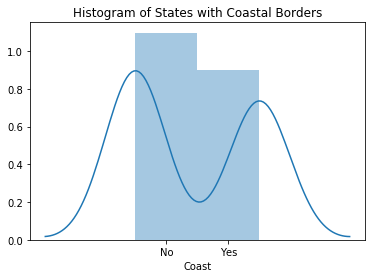

In [7]:
sns.distplot(energy.Coast.dropna(), bins=2)
plt.title("Histogram of States with Coastal Borders")
plt.xticks(ticks=[0.25, 0.75],
           labels=['No', 'Yes'])

([<matplotlib.axis.XTick at 0x1a1869eac8>,
 <a list of 4 Text xticklabel objects>)

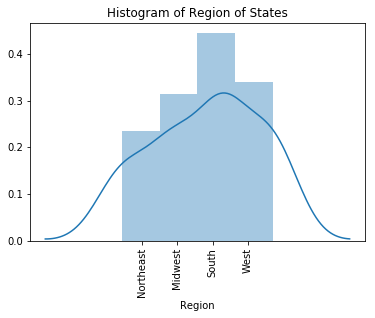

In [8]:
sns.distplot(energy.Region.dropna(), bins=4)
plt.title("Histogram of Region of States")
plt.xticks(ticks=list(np.arange(1.4, 3.6, 0.7)),
           labels=['Northeast', 'Midwest', 'South', 'West'],
          rotation=90)

([<matplotlib.axis.XTick at 0x1a18772668>,
 <a list of 9 Text xticklabel objects>)

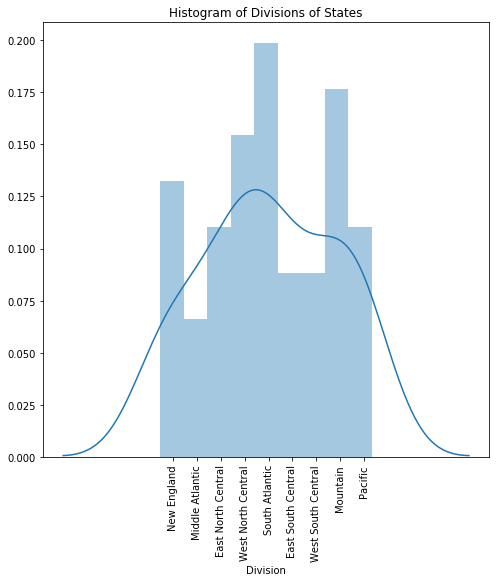

In [9]:
plt.figure(figsize=(8, 8))
sns.distplot(energy.Division.dropna(), bins=9)
plt.title("Histogram of Divisions of States")
plt.xticks(ticks=list(np.arange(1.5, 9, 0.9)),
           labels=['New England', 'Middle Atlantic', 'East North Central', 'West North Central', 'South Atlantic', 'East South Central', 'West South Central', 'Mountain', 'Pacific'],
          rotation=90)

# Barplot

See [Tableau Plot](https://public.tableau.com/profile/philip.trinh#!/vizhome/EnergyPricesUSin2014byGDP/EnergyPricesin2014byGDP?publish=yes)

# Box Plot

In [10]:
energy.drop(51, inplace=True)

Text(0, 0.5, 'Energy Consumption (in billion BTU)')

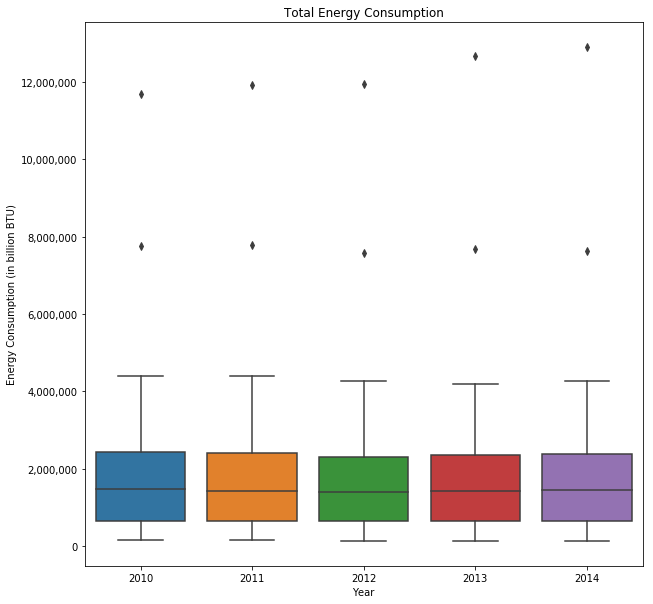

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.boxplot(data=energy.loc[:, ['TotalC2010', 'TotalC2011', 'TotalC2012', 'TotalC2013', 'TotalC2014']])
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Total Energy Consumption")
plt.xlabel("Year")
plt.xticks(ticks=list(range(5)), labels=['2010', '2011', '2012', '2013', '2014'])
plt.ylabel("Energy Consumption (in billion BTU)")

In [12]:
energy.sort_values('TotalC2010', ascending=False).iloc[:2, 1]

42         Texas
4     California
Name: State, dtype: object

# Scatter Plot

Text(0, 0.5, 'GDP (in millions USD)')

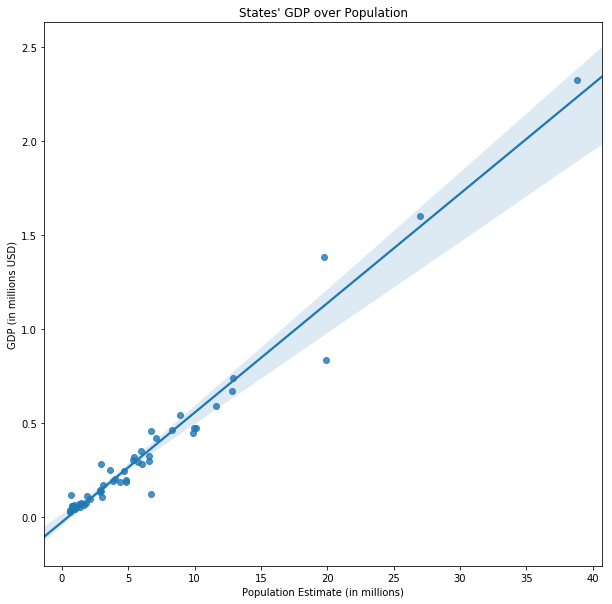

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.regplot(x='POPESTIMATE2014', y='GDP2014', data=energy)
# ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: int(x / 1_000_000)))
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: x / 1_000_000))
plt.title("States' GDP over Population")
plt.xlabel("Population Estimate (in millions)")
plt.ylabel("GDP (in millions USD)")

# Bubble Map

In [14]:
fourteen = ['State', 'Region', 'POPESTIMATE2014', 'GDP2014', 'TotalC2014', 'TotalP2014']
energy_2014 = energy[fourteen][energy.Region.notnull()]

In [15]:
energy_2014.describe()

,Region,POPESTIMATE2014,GDP2014,TotalC2014,TotalP2014
count,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,2.666667,6.252099e+06,3.379047e+05,1.929544e+06,1.622712e+06
std,1.051982,7.124005e+06,4.225183e+05,2.126122e+06,2.882341e+06
min,1.000000,5.841530e+05,2.966175e+04,1.398970e+05,3.600000e+02
25%,2.000000,1.742395e+06,8.560812e+04,6.501755e+05,2.499235e+05
50%,3.000000,4.413457e+06,1.975345e+05,1.437640e+06,6.751100e+05
75%,3.500000,6.903469e+06,4.349939e+05,2.385196e+06,1.511248e+06
max,4.000000,3.880250e+07,2.324996e+06,1.289950e+07,1.759710e+07


In [16]:
lats = []
longs = []
for state in energy_2014.State:
    if state == 'Washington':
        location = geolocator.geocode('WA, USA')
    elif state == 'New York':
        location = geolocator.geocode('NY, USA')
    else:
        location = geolocator.geocode(state + ', USA')
    lats.append(location.latitude)
    longs.append(location.longitude)

energy_2014['latitude'] = lats
energy_2014['longitude'] = longs

energy_2014['ratio'] = energy_2014.apply(lambda row: round(row.TotalC2014 / row.TotalP2014, 2), axis=1)

In [17]:
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000
energy_2014['text'] = energy_2014['State']\
                      + '<br>GDP: $' + round(energy_2014['GDP2014']/1e6, 2).astype(str)\
                      + ' million' + '<br>Energy Ratio: ' + energy_2014['ratio'].astype(str)

In [18]:
states = go.Scattergeo(
    locationmode = 'USA-states',
    lon = energy_2014['longitude'],
    lat = energy_2014['latitude'],
    text = energy_2014['text'],
    name = 'GDP',
    marker = go.scattergeo.Marker(
        size = energy_2014['GDP2014'] / scale,
        color = energy_2014['ratio'],
        colorscale = 'Bluered',
        cmax = 10,
        cmin = 0,
        colorbar = dict(title = 'Consumption /<br>Production Ratio',
                       tickmode = 'array',
                       tickvals = list(range(0, 11, 2)),
                       ticktext = [0, 2, 4, 6, 8, '>10']),
        showscale = True,
        line = go.scattergeo.marker.Line(
            width=0.5, color='rgb(40,40,40)'
        ),
        sizemode = 'area',
    ))

layout = go.Layout(
        title = go.layout.Title(
            text = '2014 US Energy Consumption / Production Ratio & GDP'
        ),
        showlegend = True,
        legend = dict(x=0),
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = go.Figure(data=[states], layout=layout)
iplot(fig, filename='d3-bubble-map-populations')

In [19]:
plot(fig, filename='energy-consumption.html')

'energy-consumption.html'

# Choropleth Map

In [20]:
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

In [21]:
data = [go.Choropleth(
    autocolorscale = True,
    locations = energy['StateCodes'],
    z = round(energy['RBIRTH2014'] / energy['RDEATH2014'], 2),
    locationmode = 'USA-states',
    text = energy['State'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Birth / Death Ratio")
)]


layout = go.Layout(
    title = go.layout.Title(
        text = '2014 US Birth / Death Ratio'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig, filename='birth_death_ratio')

In [22]:
plot(fig, filename='birth-death-ratio.html')

'birth-death-ratio.html'

# Connection Map

In [23]:
fossil_fuel = ['State', 'FossFuelC2013']
energy_2013 = energy[fossil_fuel]

energy_2013 = pd.concat([energy_2013, energy_2014[['latitude', 'longitude']]], axis=1)

In [24]:
energy_2013.sort_values('FossFuelC2013', inplace=True)
energy_2013.reset_index(drop=True, inplace=True)

energy_2013['text'] = energy_2013['State']\
                      + '<br>Rank: ' + (energy_2013.index + 1).astype(str)\
                      + '<br>Fossil Fuel Consumption: <br>' + round(energy_2013['FossFuelC2013'], 2).astype(str)\
                      + ' Billion BTU'

energy_2013.head()

,State,FossFuelC2013,latitude,longitude,text
0,District of Columbia,53357,38.893661,-76.987883,District of Columbia<br>Rank: 1<br>Fossil Fuel...
1,Vermont,89119,44.599072,-72.500261,Vermont<br>Rank: 2<br>Fossil Fuel Consumption:...
2,Rhode Island,171472,41.796241,-71.599237,Rhode Island<br>Rank: 3<br>Fossil Fuel Consump...
3,Delaware,213411,38.692045,-75.401331,Delaware<br>Rank: 4<br>Fossil Fuel Consumption...
4,New Hampshire,214922,43.484913,-71.655399,New Hampshire<br>Rank: 5<br>Fossil Fuel Consum...


In [25]:
colors = iter(Plasma256)

states = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = energy_2013['longitude'],
    lat = energy_2013['latitude'],
    text = energy_2013['text'],
    name = 'FosFuelC',
    marker = go.scattergeo.Marker(
        size = 8,
        color = energy_2013['FossFuelC2013'],
        colorscale = 'Bluered',
        cmax = 3_000_000,
        cmin = min(energy_2013['FossFuelC2013']),
        colorbar = dict(title = 'Consumption in Billion BTU',
                       tickmode = 'array',
                       tickvals = list(range(min(energy_2013['FossFuelC2013']), 3_000_010, 589329)),
                       ticktext = ['50k', '640k', '1.2M', '1.8M', '2.4M', '>3M']),
        showscale = True,
        line = go.scattergeo.marker.Line(
            width=0.5, color='rgb(40,40,40)'
        ),
        sizemode = 'area',
    ))]

rank_paths = []
for i in range(len(energy_2013)-1):
    rank_paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [energy_2013['longitude'][i], energy_2013['longitude'][i+1]],
            lat = [energy_2013['latitude'][i], energy_2013['latitude'][i+1]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 2,
                color = next(colors)
            ),
        )
    )
    for _ in range(4):
        next(colors)

layout = go.Layout(
    title = go.layout.Title(
        text = '2013 US Fossil Fuel Consumption Ranking (Lowest to Highest)'
    ),
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

fig = go.Figure(data = rank_paths + states, layout = layout)
iplot(fig)

In [26]:
plot(fig, filename='consumption-ranking.html')

'consumption-ranking.html'

# Heatmap

In [27]:
migration = pd.melt(energy, id_vars='State', value_vars=['RDOMESTICMIG2011', 'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014'], var_name='date', value_name='migration_rate')

migration.loc[migration['date']  == 'RDOMESTICMIG2011', 'date'] = datetime.date(2011, 1, 1)
migration.loc[migration['date']  == 'RDOMESTICMIG2012', 'date'] = datetime.date(2012, 1, 1)
migration.loc[migration['date']  == 'RDOMESTICMIG2013', 'date'] = datetime.date(2013, 1, 1)
migration.loc[migration['date']  == 'RDOMESTICMIG2014', 'date'] = datetime.date(2014, 1, 1)

migration['year'] = migration.date.apply(lambda row: row.year)

migration['text'] = migration['State']\
    + '<br>July ' + (migration['year'] - 1).astype(str) + ' - June ' + migration['year'].astype(str)\
    + '<br>Migration Rate: ' + round(migration['migration_rate'], 2).astype(str)

In [28]:
data = [
    go.Heatmap(
        z=migration['migration_rate'],
        x=migration['date'],
        y=migration['State'],
        colorscale='Viridis',
        colorbar = dict(title = 'Migration Rate'),
        text=migration['text'],
        hoverinfo='text'
    )
]

layout = go.Layout(
    title = 'US Domestic Migration from 2010-2014',
    xaxis = dict(range=(datetime.date(2010, 7, 1), datetime.date(2014, 7, 1))),
    yaxis = dict(autorange='reversed', automargin=True)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [29]:
plot(fig, filename='domestic-migration.html')

'domestic-migration.html'

# Stacked Area Plot

In [30]:
cali = energy.loc[energy.StateCodes == 'CA']

In [31]:
cali_melt = pd.melt(cali, id_vars='State', value_vars=['CoalE2010', 'ElecE2010', 'NatGasE2010', 'LPGE2010',
                                                       'CoalE2011', 'ElecE2011', 'NatGasE2011', 'LPGE2011',
                                                       'CoalE2012', 'ElecE2012', 'NatGasE2012', 'LPGE2012',
                                                       'CoalE2013', 'ElecE2013', 'NatGasE2013', 'LPGE2013',
                                                       'CoalE2014', 'ElecE2014', 'NatGasE2014', 'LPGE2014'],
                    var_name='type', value_name='expenditures').drop('State', axis=1)

# new data frame with split type column
split = cali_melt['type'].str.split("E2", n = 1, expand = True)
  
# seperate type
cali_melt['type']= split[0] 
  
# and year
cali_melt['year']= '2' + split[1] 

cali_melt

,type,expenditures,year
0,Coal,161.4,2010
1,Elec,33381.8,2010
2,NatGas,14914.1,2010
3,LPG,1669.8,2010
4,Coal,173.1,2011
5,Elec,33919.1,2011
6,NatGas,14353.7,2011
7,LPG,1921.0,2011
8,Coal,133.6,2012
9,Elec,34852.5,2012


In [32]:
# Calculate percentages by type and year
expenditures_prct = cali_melt.groupby(['year', 'type'])\
    .agg({'expenditures': 'sum'})\
    .groupby(level=0)\
    .apply(lambda x: x / float(x.sum()))

expenditures_prct.reset_index(inplace=True)

expenditures_prct = expenditures_prct.pivot(index='year', columns='type', values='expenditures')
expenditures_prct

type,Coal,Elec,LPG,NatGas
year,,,,
2010,0.003220,0.665943,0.033311,0.297526
2011,0.003437,0.673440,0.038140,0.284983
2012,0.002700,0.704259,0.030159,0.262883
2013,0.002422,0.692641,0.027930,0.277007
2014,0.002369,0.690295,0.024946,0.282391


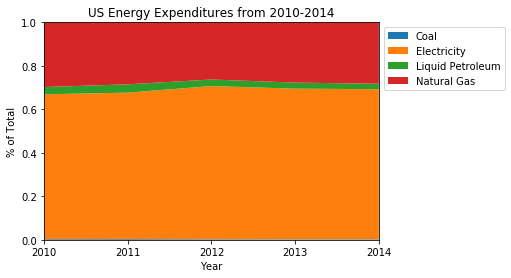

In [33]:
# Make the plot
plt.stackplot(expenditures_prct.index,
              expenditures_prct['Coal'],
              expenditures_prct['Elec'],
              expenditures_prct['LPG'],
              expenditures_prct['NatGas'],
              labels=['Coal', 'Electricity', 'Liquid Petroleum', 'Natural Gas'])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.margins(0,0)
plt.title("US Energy Expenditures from 2010-2014")
plt.xlabel('Year')
plt.ylabel('% of Total')
plt.show()

# Treemapping (on Tableau)

In [34]:
net_migration = pd.melt(energy, id_vars='State',
                        value_vars=['RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013', 'RNETMIG2014'],
                        var_name='migration', value_name='rate')

split = net_migration['migration'].str.split("G2", n = 1, expand = True)

net_migration['year']= '2' + split[1] 
net_migration.drop('migration', axis=1, inplace=True)
net_migration

,State,rate,year
0,Alabama,1.011941,2011
1,Alaska,0.948185,2011
2,Arizona,2.317801,2011
3,Arkansas,3.336628,2011
4,California,2.761377,2011
5,Colorado,6.933159,2011
6,Connecticut,1.116894,2011
7,Delaware,5.303282,2011
8,Florida,11.359606,2011
9,Georgia,3.375007,2011


In [35]:
net_migration.to_csv('net_migration.csv', index=False)

Tidy Transformation

In [36]:
energy_long = pd.melt(energy, id_vars='State',
                        value_vars=['TotalC2010', 'TotalC2011', 'TotalC2012', 'TotalC2013', 'TotalC2014',
                                    'TotalP2010', 'TotalP2011', 'TotalP2012', 'TotalP2013', 'TotalP2014',
                                    'TotalE2010', 'TotalE2011', 'TotalE2012', 'TotalE2013', 'TotalE2014',
                                    'TotalPrice2010', 'TotalPrice2011', 'TotalPrice2012', 'TotalPrice2013', 'TotalPrice2014',
                                    'TotalC10-11', 'TotalC11-12', 'TotalC12-13', 'TotalC13-14',
                                    'TotalP10-11', 'TotalP11-12', 'TotalP12-13', 'TotalP13-14',
                                    'TotalE10-11', 'TotalE11-12', 'TotalE12-13', 'TotalE13-14',
                                    'TotalPrice10-11', 'TotalPrice11-12', 'TotalPrice12-13', 'TotalPrice13-14',
                                    'BiomassC2010', 'BiomassC2011', 'BiomassC2012', 'BiomassC2013', 'BiomassC2014',
                                    'CoalC2010', 'CoalC2011', 'CoalC2012', 'CoalC2013', 'CoalC2014',
                                    'CoalP2010', 'CoalP2011', 'CoalP2012', 'CoalP2013', 'CoalP2014',
                                    'CoalE2010', 'CoalE2011', 'CoalE2012', 'CoalE2013', 'CoalE2014',
                                    'CoalPrice2010', 'CoalPrice2011', 'CoalPrice2012', 'CoalPrice2013', 'CoalPrice2014',
                                    'ElecC2010', 'ElecC2011', 'ElecC2012', 'ElecC2013', 'ElecC2014',
                                    'ElecE2010', 'ElecE2011', 'ElecE2012', 'ElecE2013', 'ElecE2014',
                                    'ElecPrice2010', 'ElecPrice2011', 'ElecPrice2012', 'ElecPrice2013', 'ElecPrice2014',
                                    'FossFuelC2010', 'FossFuelC2011', 'FossFuelC2012', 'FossFuelC2013', 'FossFuelC2014',
                                    'GeoC2010', 'GeoC2011', 'GeoC2012', 'GeoC2013', 'GeoC2014',
                                    'GeoP2010', 'GeoP2011', 'GeoP2012', 'GeoP2013', 'GeoP2014',
                                    'HydroC2010', 'HydroC2011', 'HydroC2012', 'HydroC2013', 'HydroC2014',
                                    'HydroP2010', 'HydroP2011', 'HydroP2012', 'HydroP2013', 'HydroP2014',
                                    'NatGasC2010', 'NatGasC2011', 'NatGasC2012', 'NatGasC2013', 'NatGasC2014',
                                    'NatGasE2010', 'NatGasE2011', 'NatGasE2012', 'NatGasE2013', 'NatGasE2014',
                                    'NatGasPrice2010', 'NatGasPrice2011', 'NatGasPrice2012', 'NatGasPrice2013', 'NatGasPrice2014',
                                    'LPGC2010', 'LPGC2011', 'LPGC2012', 'LPGC2013', 'LPGC2014',
                                    'LPGE2010', 'LPGE2011', 'LPGE2012', 'LPGE2013', 'LPGE2014',
                                    'LPGPrice2010', 'LPGPrice2011', 'LPGPrice2012', 'LPGPrice2013', 'LPGPrice2014',
                                    'GDP2010Q1', 'GDP2010Q2', 'GDP2010Q3', 'GDP2010Q4', 'GDP2010',
                                    'GDP2011Q1', 'GDP2011Q2', 'GDP2011Q3', 'GDP2011Q4', 'GDP2011',
                                    'GDP2012Q1', 'GDP2012Q2', 'GDP2012Q3', 'GDP2012Q4', 'GDP2012',
                                    'GDP2013Q1', 'GDP2013Q2', 'GDP2013Q3', 'GDP2013Q4', 'GDP2013',
                                    'GDP2014Q1', 'GDP2014Q2', 'GDP2014Q3', 'GDP2014Q4', 'GDP2014',
                                    'CENSUS2010POP', 'POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013', 'POPESTIMATE2014',
                                    'RBIRTH2011', 'RBIRTH2012', 'RBIRTH2013', 'RBIRTH2014',
                                    'RDEATH2011', 'RDEATH2012', 'RDEATH2013', 'RDEATH2014',
                                    'RNATURALINC2011', 'RNATURALINC2012', 'RNATURALINC2013', 'RNATURALINC2014',
                                    'RINTERNATIONALMIG2011', 'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013', 'RINTERNATIONALMIG2014',
                                    'RDOMESTICMIG2011', 'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014',
                                    'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013', 'RNETMIG2014'],
                        var_name='category', value_name='value')

In [37]:
energy_long.head()

,State,category,value
0,Alabama,TotalC2010,1931522.0
1,Alaska,TotalC2010,653221.0
2,Arizona,TotalC2010,1383531.0
3,Arkansas,TotalC2010,1120632.0
4,California,TotalC2010,7760629.0


In [38]:
split = energy_long['category'].str.split(r'(201[0-4])', expand=True).drop(2, axis=1)
energy_long['category'] = split[0]
energy_long['year'] = split[1]
energy_long.head()

,State,category,value,year
0,Alabama,TotalC,1931522.0,2010
1,Alaska,TotalC,653221.0,2010
2,Arizona,TotalC,1383531.0,2010
3,Arkansas,TotalC,1120632.0,2010
4,California,TotalC,7760629.0,2010


In [39]:
energy_long.to_csv('energy_long.csv', index=False)